In [19]:
%matplotlib notebook
import serial
import numpy as np
from matplotlib import pyplot as plt
from time import time
ser = serial.Serial('COM3',115200)
# set plot to animated
plt.ion()

<IPython.core.display.Javascript object>


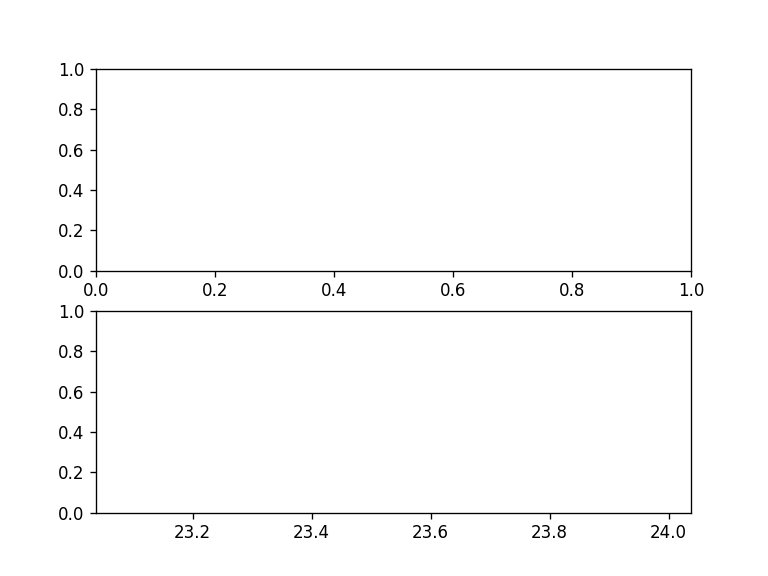

<IPython.core.display.Javascript object>


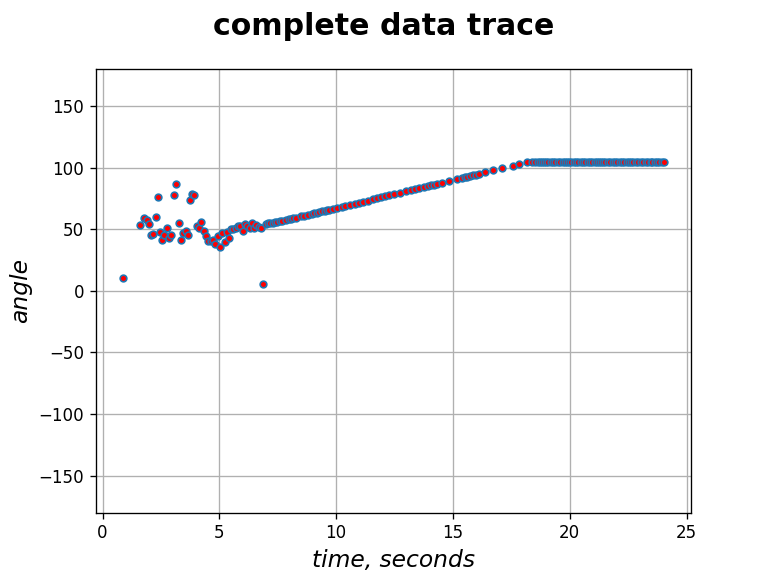

<IPython.core.display.Javascript object>


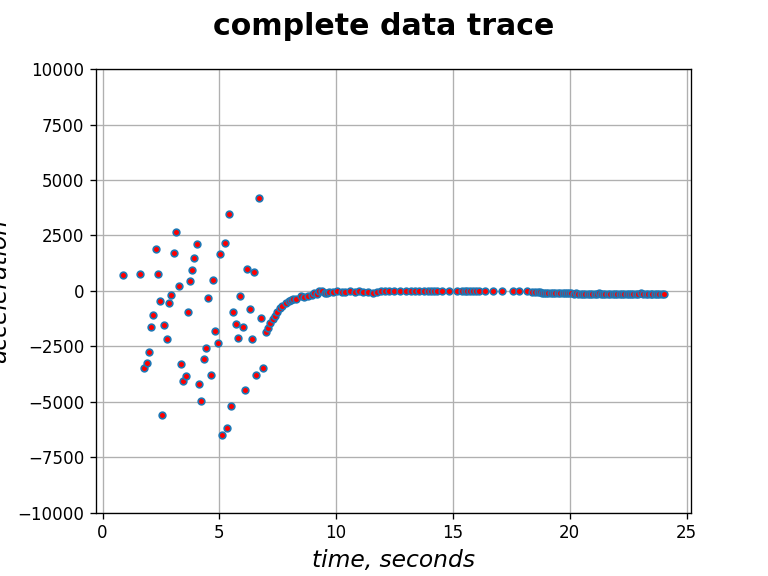

In [20]:
start_time = time()
timepoints = []
ydata = []
yrange = [-180,180]
view_time = 1 # seconds of data to view at once
duration = 24 # total seconds to collect data

#angle graph
#fig1 = plt.figure()
fig0 = plt.figure()
#fig1 = plt.subplot(211)
#fig1.suptitle('live updated data', fontsize='18', fontweight='bold')
plt.xlabel('time, seconds', fontsize='14', fontstyle='italic')
plt.ylabel('angle', fontsize='14', fontstyle='italic')
plt.axes().grid(True)
line1, = plt.plot(ydata,marker='o',markersize=4,linestyle='none',markerfacecolor='red')
plt.ylim(yrange)
plt.xlim([0,view_time])

#acceleration graph
zdata=[]
zrange=[-10000,10000]
#fig2 = plt.figure()
#fig2 = plt.subplot(212)
#fig2.suptitle('live updated data', fontsize='18', fontweight='bold')
plt.xlabel('time, seconds', fontsize='14', fontstyle='italic')
plt.ylabel('acceleration', fontsize='14', fontstyle='italic')
plt.axes().grid(True)
line2, = plt.plot(zdata,marker='o',markersize=4,linestyle='none',markerfacecolor='red')
plt.ylim(zrange)
plt.xlim([0,view_time])

run = True
# collect the data and plot a moving frame
while run :
    ser.reset_input_buffer()
    data = ser.readline()    
    data = data.decode().split()
    #print(data)
    
    #reject if data is cut off
    try:
        if ((len(data[0]) < 4) or (len(data[1]) < 3)):
            continue
        #print(data)
    except IndexError:
        continue
    #print(data[0])
    
    try:
        # store the entire dataset for later
        ydata.append(float(data[0]))
        timepoints.append(time()-start_time)
        current_time = timepoints[-1]
        
        zdata.append(float(data[1]))
        
        # update the plotted data
        fig1 = plt.subplot(211)
        line1.set_xdata(timepoints)
        line1.set_ydata(ydata)
        
        #fig2 = plt.subplot(212)
        line2.set_xdata(timepoints)
        line2.set_ydata(zdata)
        
        # slide the viewing frame along
        if current_time > view_time:
            plt.xlim([current_time-view_time,current_time])
            
        # when time's up, kill the collect+plot loop
        if timepoints[-1] > duration: run=False
    
    # if the try statement throws an error, just do nothing
    except: pass
    
    # update the plot
    fig0.canvas.draw()
    #fig1.canvas.draw()
    #fig2.canvas.draw()

#angle graph
fig3 = plt.figure()
fig3.suptitle('complete data trace', fontsize='18', fontweight='bold')
plt.xlabel('time, seconds', fontsize='14', fontstyle='italic')
plt.ylabel('angle', fontsize='14', fontstyle='italic')
plt.axes().grid(True)

plt.plot(timepoints, ydata,marker='o',markersize=4,linestyle='none',markerfacecolor='red')
plt.ylim(yrange)
fig3.show()

#acceleration graph
fig4 = plt.figure()
fig4.suptitle('complete data trace', fontsize='18', fontweight='bold')
plt.xlabel('time, seconds', fontsize='14', fontstyle='italic')
plt.ylabel('acceleration', fontsize='14', fontstyle='italic')
plt.axes().grid(True)

plt.plot(timepoints, zdata,marker='o',markersize=4,linestyle='none',markerfacecolor='red')
plt.ylim(zrange)
fig4.show()

ser.close()


In [ ]:
ser.close()